In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd gdrive/My Drive/Colab Notebooks/Journal_2/CICDS DATASET

/content/gdrive/My Drive/Colab Notebooks/Journal_2/CICDS DATASET


In [22]:
dataset_1 = pd.read_csv('data1.csv')
dataset_2 = pd.read_csv('data2.csv')
dataset_3 = pd.read_csv('data3.csv')
dataset_4 = pd.read_csv('data4.csv')
dataset_5 = pd.read_csv('data5.csv')
dataset_6 = pd.read_csv('data6.csv')

In [23]:
merge_dataset = pd.concat([dataset_1, dataset_2, dataset_3, dataset_4, dataset_5, dataset_6])

In [25]:
merge_dataset.to_csv(r'cicds_data.csv', encoding='utf-8', index = False)

In [26]:
dataset = pd.read_csv('cicds_data.csv')

In [27]:
dataset.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075080 entries, 0 to 2075079
Columns: 79 entries,  Destination Port to  Label
dtypes: float64(24), int64(54), object(1)
memory usage: 1.2+ GB


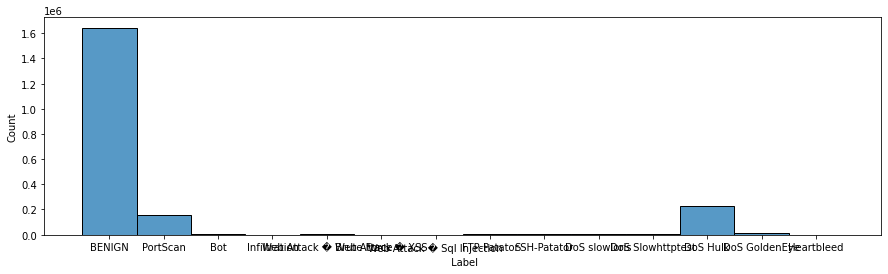

In [30]:
plt.figure(figsize=(15,4))
sns.histplot(dataset[' Label'])

In [32]:
columns = ['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count',
       'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min',
       'Label']


In [33]:
dataset.columns = columns

In [36]:
dataset.to_csv(r'cicds_data1.csv', encoding = 'utf-8', index=False)

In [37]:
df = pd.read_csv('cicds_data1.csv')

In [ ]:
i = 0
for each in df['Label']:
  if each == "BENIGN":
    df['Label'][i] = 0
  else:
    df['Label'][i] = 1
  i = i + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
columns = dataset.columns[0:10000]

In [ ]:
df = dataset.drop(columns=columns, axis = 1)

In [ ]:
df = df.drop(labels = ['Subject'], axis = 1)

In [ ]:
df.head()

,MAV,MedF,Muscle,Signal,Task,Target
0,0.049547,89.833333,1,1,1,0
1,0.043734,79.666667,2,1,1,0
2,0.020549,76.500000,3,1,1,0
3,0.063631,91.333333,4,1,1,0
4,0.021106,73.666667,5,1,1,0


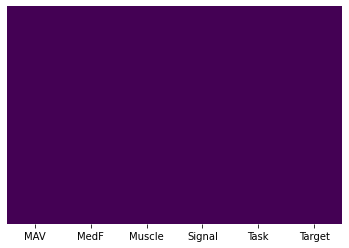

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MAV     3184 non-null   float64
 1   MedF    3184 non-null   float64
 2   Muscle  3184 non-null   int64  
 3   Signal  3184 non-null   int64  
 4   Task    3184 non-null   int64  
 5   Target  3184 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 149.4 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['MAV','MedF']])
scaled_features = scaler.transform(df[['MAV','MedF']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['MAV','MedF']])
scaled_features = scaler.transform(df[['MAV','MedF']])

In [ ]:
feature_1 = pd.DataFrame(scaled_features, columns = ['MAV','MedF'])
feature_2 = df[['Muscle','Signal','Task']]

In [ ]:
features = pd.concat([feature_1,feature_2],axis=1)
target = df['Target']

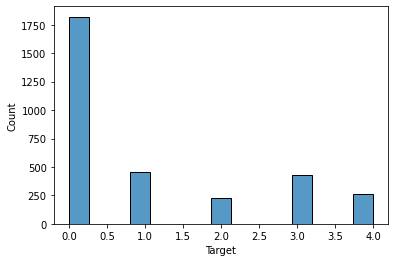

In [ ]:
sns.histplot(target)

In [ ]:
df = pd.concat([features,target], axis = 1)

In [ ]:
df

,MAV,MedF,Muscle,Signal,Task,Target
0,0.270426,0.485521,1,1,1,0
1,0.237437,0.335182,2,1,1,0
2,0.105866,0.288355,3,1,1,0
3,0.350348,0.507702,4,1,1,0
4,0.109027,0.246457,5,1,1,0
...,...,...,...,...,...,...
3179,0.214660,0.290203,4,15,27,0
3180,0.118608,0.216266,5,15,27,0
3181,0.039510,0.476895,6,15,27,0
3182,0.039556,0.190388,7,15,27,3


In [ ]:
new = df.to_csv(r'pre_chris.csv',encoding='utf-8', index = False)

In [ ]:
dataset_1 = pd.read_csv('pre_chris.csv')

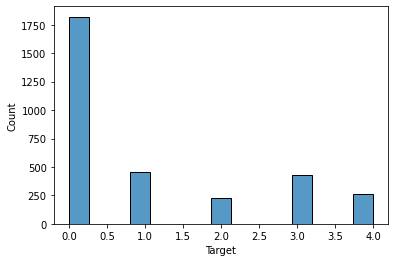

In [ ]:
sns.histplot(dataset_1['Target'])

In [ ]:
dataset_1.Target.value_counts()

0    1821
1     453
3     426
4     259
2     225
Name: Target, dtype: int64

In [ ]:
df_class_0 = dataset_1[dataset_1['Target'] == 0]
df_class_others = dataset_1[dataset_1['Target'] != 0]

In [ ]:
df_class_others.shape

(1363, 6)

In [ ]:
df_class_0_under = df_class_0.sample(500)

In [ ]:
merge_df = pd.concat([df_class_0_under, df_class_others], axis = 0)

In [ ]:
new = merge_df.to_csv(r'pre_chris_under.csv',encoding='utf-8', index = False)

**OVERSAMPLING**

In [ ]:
df_class_0 = dataset_1[dataset_1['Target'] == 0]
df_class_1 = dataset_1[dataset_1['Target'] == 1]
df_class_2 = dataset_1[dataset_1['Target'] == 2]
df_class_3 = dataset_1[dataset_1['Target'] == 3]
df_class_4 = dataset_1[dataset_1['Target'] == 4]

In [ ]:
df_class_1_over = df_class_1.sample(1821, replace=True)
df_class_2_over = df_class_2.sample(1821, replace=True)
df_class_3_over = df_class_3.sample(1821, replace=True)
df_class_4_over = df_class_4.sample(1821, replace=True)

In [ ]:
merge_df = pd.concat([df_class_0,df_class_1_over, df_class_2_over, df_class_3_over, df_class_4_over])

In [ ]:
merge_df.shape

(9105, 6)

In [ ]:
new = merge_df.to_csv(r'pre_chris_over.csv',encoding='utf-8', index = False)

**SMOTE**

In [ ]:
X = dataset_1.drop('Target', axis = 1)
y = dataset_1['Target']

In [ ]:
X

,MAV,MedF,Muscle,Signal,Task
0,0.270426,0.485521,1,1,1
1,0.237437,0.335182,2,1,1
2,0.105866,0.288355,3,1,1
3,0.350348,0.507702,4,1,1
4,0.109027,0.246457,5,1,1
...,...,...,...,...,...
3179,0.214660,0.290203,4,15,27
3180,0.118608,0.216266,5,15,27
3181,0.039510,0.476895,6,15,27
3182,0.039556,0.190388,7,15,27


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_sm, y_sm = smote.fit_sample(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
dataset_1.columns[-1]

'Target'

In [ ]:
x_sm = pd.DataFrame(x_sm, columns=dataset_1.columns[:-1])
y_sm = pd.DataFrame(y_sm, columns=[dataset_1.columns[-1]])

In [ ]:
y_sm

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9100,4
9101,4
9102,4
9103,4


In [ ]:
merge_df = pd.concat([x_sm,y_sm], axis = 1)

In [ ]:
merge_df

,MAV,MedF,Muscle,Signal,Task,Target
0,0.270426,0.485521,1.000000,1.000000,1.000000,0
1,0.237437,0.335182,2.000000,1.000000,1.000000,0
2,0.105866,0.288355,3.000000,1.000000,1.000000,0
3,0.350348,0.507702,4.000000,1.000000,1.000000,0
4,0.109027,0.246457,5.000000,1.000000,1.000000,0
...,...,...,...,...,...,...
9100,0.103400,0.293493,5.000000,12.339069,12.678137,4
9101,0.037782,0.216097,3.000000,4.164845,26.164845,4
9102,0.108854,0.301330,3.000000,13.000000,24.176739,4
9103,0.200912,0.239484,2.602493,7.000000,16.000000,4


In [ ]:
new = merge_df.to_csv(r'pre_chris_smote.csv',encoding='utf-8', index = False)